# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
absences = pd.read_csv("../data/absences.csv")

In [3]:
absences.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

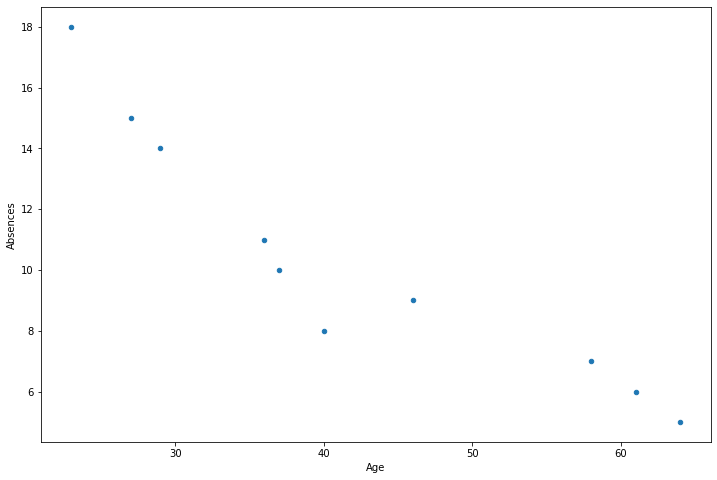

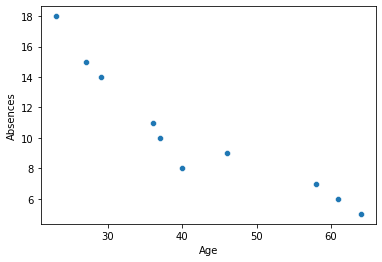

In [12]:
#sns.scatterplot(data=df, x="x_var", y="y_var")
age_abs_plot = sns.scatterplot(data= absences, x="Age", y="Absences")


In [4]:
# your comments here:
''' With increasing age the number of absences decreases. The scatterplot creates a regression line with one outlier around the age 40.'''

' With increasing age the number of absences decreases. The scatterplot creates a regression line with one outlier around the age 40.'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [5]:
#your code here
'''
slope = (mean(xy)-(mean(x)*mean(y)))/(mean(x²)-(mean(x)²))
intercept = mean(y) - mean(x)*slope)
'''

def slope_intercept_from_two_var(x, y):
    #Slope
    slope = (np.mean(x*y) - (np.mean(x)*np.mean(y))) / (np.mean(np.power(x, 2))-np.power(np.mean(x),2))
    # Intercept
    intercept = np.mean(y)-(np.mean(x)*slope)
    return slope, intercept

pandas.core.series.Series

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [6]:
slope, intercept = slope_intercept_from_two_var(x=absences["Age"], y=absences["Absences"])

print("Slope is:", slope)
print("Intercept is:", intercept)

Slope is: -0.26810883370334093
Intercept is: 21.587381898910657


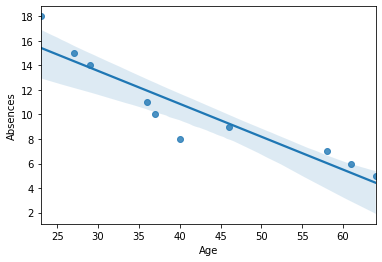

In [7]:
# your comments here
sns.regplot(x='Age',y='Absences', data=absences)
plt.show()

In [8]:
#The line clearly shows the negative regression line.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [9]:
def covariance_correlation(x,y):
    n= len(x)
    cov = (sum((x - np.mean(x)) * (y - np.mean(y)) ))/(n-1)
    corr = (sum((x - np.mean(x)) *(y - np.mean(y)) ) )/ (np.sqrt(sum((x-np.mean(x))**2)*sum((y - np.mean(y))**2)))
    return cov, corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [60]:
# your code here


Correlation: -0.9325434092481012
Covariance: -57.699999999999996


In [11]:
corr, cov = covariance_correlation(absences["Age"], absences["Absences"])
print("Correlation is:", corr)
print("Covariance is:", cov)

Correlation is: -57.699999999999996
Covariance is: -0.9325434092481012


In [51]:
# your comments here
#Correlation is a high negative number, so older employees are less likely to be absent. 
#Covariance is negative, age and absences are negatively dependent.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [62]:
# your comments here
#We can see from the scatterplot as well as the correlation and covariance numbers that absenteeism is influenced by age. 

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [14]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [15]:
# your code here
iron_cor, iron_cov = covariance_correlation(ironbeers_df["X"], ironbeers_df["Y"])
print("Correlation is:", iron_cor)
print("Covariance is:", iron_cov)

Correlation is: 12.0
Covariance is: 0.9770084209183943


Correlation: 0.9770084209183943
Covariance: 12.0


In [65]:
# your comments here
#The more people I tell to stay, the more will actually stay. 
#Positive covariance --> variables are positively dependant.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

Text(0, 0.5, 'People that actually stayed')

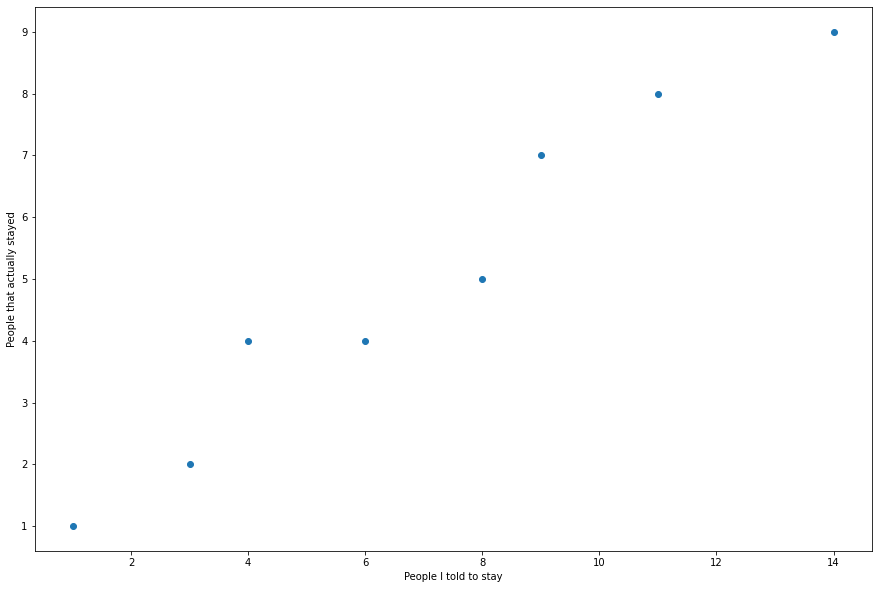

In [17]:
# your code here

fig, ax = plt.subplots(figsize = (15,10))

plt.scatter(ironbeers_df['X'], ironbeers_df['Y'])
plt.xlabel("People I told to stay")
plt.ylabel("People that actually stayed")

In [66]:
# your comments here
#The scatterplot shows the same result we got with the function before. 

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [19]:
# your code here
slope, intercept = slope_intercept_from_two_var(ironbeers_df["X"], ironbeers_df["Y"])
print("Slope is:", slope)
print("Intercept is:", intercept)

Slope is: 0.6363636363636364
Intercept is: 0.5454545454545459


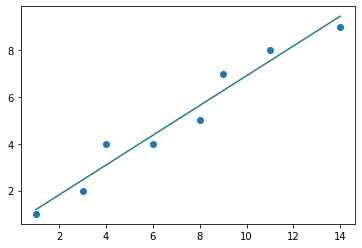

<AxesSubplot:xlabel='X', ylabel='Y'>

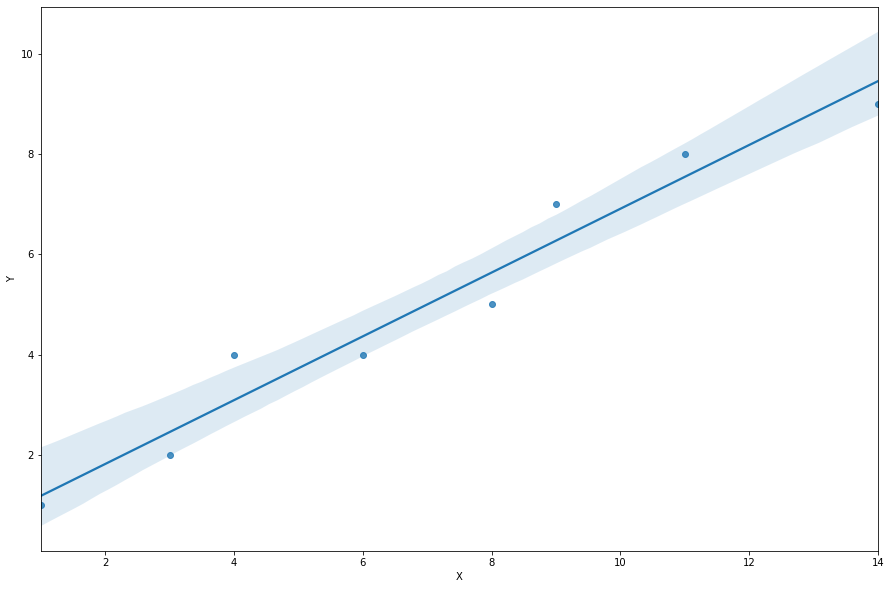

In [20]:
fig, ax = plt.subplots(figsize=(15,10))

sns.regplot(x="X", y="Y", data= ironbeers_df)

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here
#There seems to be a correlation, but another factor could be that people are more likely to stay if others stay as well.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


R2_score: 0.9545454545454548


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


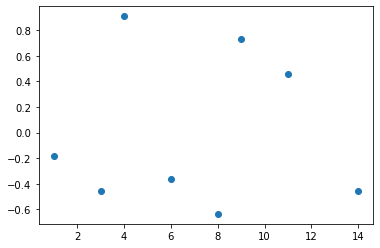

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# comment here

#### 4.- Remove the points with a high error (0.6 threshold) and recalculate the regression line.

In [49]:
# your code here 


,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,6,4,4.363636,-0.363636
3,8,5,5.636364,-0.636364
4,11,8,7.545455,0.454545
5,14,9,9.454545,-0.454545


Plot before deleting higher error data points: 


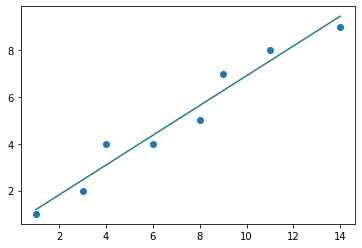

Plot after deleting higher error data points: 


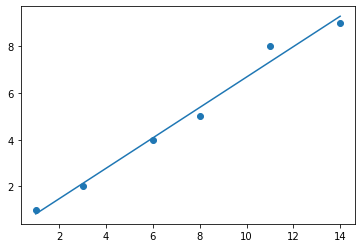

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here


Covariance and correlation before deleting higher error data points: 


(12.0, 0.9770084209183943)

Covariance and correlation after deleting higher error data points: 


(15.433333333333332, 0.9928560954470167)

In [87]:
# your comments here

